In [1]:
import pandas as pd
import fastai
from fastai.text import TextList, TokenizeProcessor, NumericalizeProcessor, TextLMDataBunch, language_model_learner
from fastai.datasets import URLs

%matplotlib inline

In [3]:
df = pd.read_csv(".\data\love_quotes.csv")

In [4]:
df.head()

,authors,likes,quotes,tags
0,Marilyn Monroe,146304,"“I'm selfish, impatient and a little insecure....","['attributed-no-source', 'best', 'life', 'love..."
1,William W. Purkey,115081,“You've gotta dance like there's nobody watchi...,"['dance', 'heaven', 'hurt', 'inspirational', '..."
2,Dr. Seuss,112440,“You know you're in love when you can't fall a...,"['attributed-no-source', 'dreams', 'love', 're..."
3,Elbert Hubbard,76936,“A friend is someone who knows all about you a...,"['friend', 'friendship', 'knowledge', 'love']"
4,"Martin Luther King Jr.,",70107,“Darkness cannot drive out darkness: only ligh...,"['darkness', 'drive-out', 'hate', 'inspiration..."


In [5]:
df = df[["quotes", "likes"]]

In [6]:
data_lm = (TextList.from_df(df, processor=[TokenizeProcessor(), NumericalizeProcessor(max_vocab=60000, min_freq=5)])
            .random_split_by_pct(0.2)
            .label_for_lm()           
            .databunch(bs=32))

In [7]:
data_lm.save()

In [8]:
data = TextLMDataBunch.load(".\\", bs=32)

In [95]:
data.show_batch

<bound method DataBunch.show_batch of TextLMDataBunch;

Train: LabelList
y: LMLabel (7007 items)
[Category 0, Category 0, Category 0, Category 0, Category 0]...
Path: .
x: LMTextList (7007 items)
[Text xxbos “ xxmaj be yourself ; everyone else is already taken . ”, Text xxbos “ xxmaj be the change that you wish to see in the world . ”, Text xxbos “ xxmaj no one can make you feel inferior without your xxunk . ”, Text xxbos “ xxmaj live as if you were to die tomorrow . xxmaj learn as if you were to live forever . ”, Text xxbos “ xxmaj darkness can not drive out darkness : only light can do that . xxmaj hate can not drive out hate : only love can do that . ”]...
Path: .;

Valid: LabelList
y: LMLabel (1751 items)
[Category 0, Category 0, Category 0, Category 0, Category 0]...
Path: .
x: LMTextList (1751 items)
[Text xxbos “ xxmaj xxunk us that greatness lies even in the smallest of moments , in the xxunk of hearts , and we shall , each of us , be called to greatness . xxmaj whether we shal

In [10]:
learn = language_model_learner(data, pretrained_model=URLs.WT103_1, drop_mult=0.3)

In [11]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


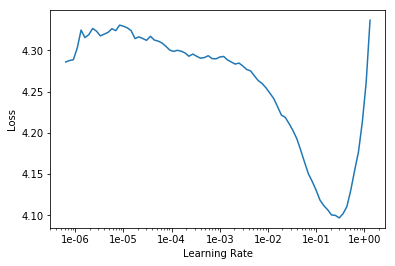

In [12]:
learn.recorder.plot(skip_end=10)

In [13]:
learn.fit_one_cycle(1, 1e-01, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy
1,3.911520,3.614188,0.276597


In [18]:
learn.unfreeze()

In [20]:
learn.fit_one_cycle(2, 1e-03, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy
1,3.427921,3.475850,0.294040
2,3.286178,3.450180,0.301582


In [49]:
print(learn.predict("love is", 15, temperature=0.9))

i make mistakes treated raw power sought against health mother earn feelings force whether secure challenges world free


In [21]:
print(learn.predict("love is", 15, temperature=0.9))

love is book takes makes goddess buried deeply wonderful yours whisper universal & for dear rock angry


In [24]:
print(learn.predict(" ", 15, temperature=0.9))

  fighting i experience mind man probably blood lasts died fifty stays ordinary intimacy 4 different


In [6]:
df = pd.read_csv(".\data\inspirational_final.csv")

In [7]:
df = df[df.likes > 0][["quotes", "likes"]]

### Some quotes are not in eglish, lets remove them

In [11]:
# !pip install langdetect

  Stored in directory: C:\Users\Alberto Seabra\AppData\Local\pip\Cache\wheels\ec\0c\a9\1647275e7ef5014e7b83ff30105180e332867d65e7617ddafe
Successfully built langdetect


In [12]:
from langdetect import detect

In [28]:
df["english"] = df.quotes.apply(lambda x: 1 if detect(x) == 'en' else 0)

In [30]:
df[df.english == 0]

,quotes,likes,english
68,“Always do what you are afraid to do.”,7687,0
251,“مش مهم انك تغير الكون... المهم انك تخلي الكون...,2348,0
309,"“We don't make mistakes, just happy little acc...",1939,0
398,“أريد لحظة انفعال...لحظة حب...لحظة دهشة..لحظة ...,1470,0
492,“Never lose hope. Storms make people stronger ...,1184,0
499,“الإكتشاف ليس أن تجد أرضاً جديدة .. وإنما أن ت...,1164,0
501,"“Never stop dreaming, never stop believing, ne...",1160,0
513,“Resentment is like drinking poison and then h...,1203,0
560,“ما تبحث عنه يبحث عنك”,998,0
590,“Fake it 'till you make it.”,929,0


This doesnt work well

In [31]:
# !pip install textblob

In [32]:
from textblob import TextBlob

### slow method

In [37]:
df["english"] = df.quotes.apply(lambda x: 1 if TextBlob(x).detect_language() == 'en' else 0)

HTTPError: HTTP Error 503: Service Unavailable

HTTPError: HTTP Error 503: Service Unavailable --- another failure

In [8]:
# not a good method i know but i can get rid of the quotes written in different alphabets
df["english"] = df.quotes.apply(lambda x: 1 if "a" in x or "e" in x else 0)

In [9]:
df = df[df.english == 1][["quotes", "likes"]]

In [13]:
df.head()

,quotes,likes
0,“Be yourself; everyone else is already taken.”,143486
1,“You've gotta dance like there's nobody watchi...,115082
2,“Be the change that you wish to see in the wor...,103308
3,“No one can make you feel inferior without you...,82823
4,“Live as if you were to die tomorrow. Learn as...,70903


In [14]:
data_lm = (TextList.from_df(df, processor=[TokenizeProcessor(), NumericalizeProcessor(max_vocab=60000, min_freq=5)])
            .random_split_by_pct(0.2)
            .label_for_lm()           
            .databunch(bs=32))

AttributeError: 'DataFrame' object has no attribute 'isna'

In [61]:
data_lm.save()

In [15]:
data = TextLMDataBunch.load(".\\", bs=32)

In [16]:
data.show_batch

<bound method DataBunch.show_batch of TextLMDataBunch;

Train: LabelList (6920 items)
x: LMTextList
xxbos “ xxmaj you 've got ta dance like there 's nobody watching , xxmaj love like you 'll never be hurt , xxmaj sing like there 's nobody listening , xxmaj and live like it 's heaven on earth . ”,xxbos “ xxmaj be the change that you wish to see in the world . ”,xxbos “ xxmaj live as if you were to die tomorrow . xxmaj learn as if you were to live forever . ”,xxbos “ xxmaj darkness can not drive out darkness : only light can do that . xxmaj hate can not drive out hate : only love can do that . ”,xxbos “ xxmaj we accept the love we think we deserve . ”
y: LMLabelList
,,,,
Path: .;

Valid: LabelList (1729 items)
x: LMTextList
xxbos “ xxmaj if you do follow your bliss you put yourself on a kind of track that has been there all the while , waiting for you , and the life that you ought to be living is the one you are living . xxmaj follow your bliss and do n't be afraid , and doors will open 

In [24]:
from fastai.text import AWD_LSTM

In [26]:
learn = language_model_learner(data, pretrained=True, drop_mult=0.3, arch= AWD_LSTM)

In [64]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


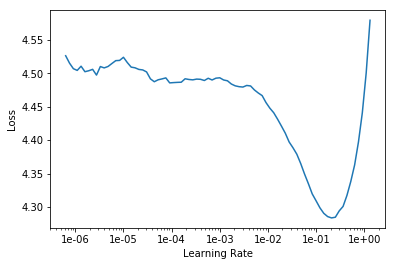

In [65]:
learn.recorder.plot(skip_end=10)

In [66]:
learn.fit_one_cycle(1, 1e-01, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy
1,4.033982,3.705898,0.298179


In [67]:
learn.fit_one_cycle(1, 1e-01, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy
1,3.969205,3.760564,0.295451


In [74]:
learn.unfreeze()

In [75]:
learn.fit_one_cycle(5, 1e-02, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy
1,3.551324,3.553672,0.315840
2,3.417729,3.431979,0.334864
3,3.056676,3.278171,0.367707
4,2.494306,3.235880,0.391965
5,1.925082,3.348708,0.396236


In [90]:
learn.fit_one_cycle(1, 1e-02, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy
1,2.310842,3.314992,0.386849


In [91]:
learn.save('quotes_fine_tuned')

In [92]:
print(learn.predict("always do", 10, temperature=1))

always do ready achievement different gave spoke forgiven salvation language died blind


In [100]:
print(learn.predict("life is", 10, temperature=0.85))

life is explore perceive fully joy painting teaches .- discovery price without


In [101]:
print(learn.predict("xxmaj", 10, temperature=0.85))

xxmaj single troubles line will positive depths loving soldier necessarily sort


In [97]:
print(learn.predict("life is", 10, temperature=0.6))

life is drawn telling exercise political chaos angry daring na remember battles


In [98]:
print(learn.predict("life is", 10, temperature=0.5))

life is forces enough rough tale stars poor solution negativity girl benefit


In [81]:
print(learn.predict("life is", 10, temperature=0.4))

life is responsibility fragile amazing calls indifferent butterflies throwing friends considered ideas


In [82]:
print(learn.predict("life ", 10, temperature=0.3))

life  freedom reasons express figured receiving xxbos fertile survival high somebody


In [83]:
print(learn.predict("life", 10, temperature=0.2))

life vain desk ourselves their winter sand criteria compliments in here


In [102]:
print(learn.predict("life is", 10, temperature=0.1))

life is main view recover physical suffer guts optimism master gentle fine


In [114]:
print("\n".join(str(i+1) + "- " + learn.predict("life is", 10, temperature=0.9, no_unk=True) for i in range(5)))

1- life is should sorry fully free stolen beaten focusing follow prefer than
2- life is worry personal beach ears silver awe guide sesuatu effective asleep
3- life is feed flame prince broken hardly frightened failure act pursue voices
4- life is sadness author value fucking helps thinking se busy nurture lower
5- life is foolish names understand clean fierce seldom height until height plans


In [115]:
print("\n".join(str(i+1) + "- " + learn.predict("think", 10, temperature=0.9, no_unk=True) for i in range(5)))

1- think flowing stupid among perfect eternal formed believing nation suffered asleep
2- think content tools target skill vulnerable somebody count distant shall told
3- think immeasurable use forgiveness birth ir exploitation skills seven ear fingers
4- think exact devil none en roads resources water quickly yourself burden
5- think por convince ini truths ghost family white capacity allows older


In [116]:
print("\n".join(str(i+1) + "- " + learn.predict("try to", 10, temperature=0.9, no_unk=True) for i in range(5)))

1- try to tidak under wind moment ’d window king clearly anyone he
2- try to cultivate came things woman ang listening course maybe million speaking
3- try to already if fail habit seen telling ground mess listening indifferent
4- try to struggling creature remembering lain decides fallen freedom follow chances scale
5- try to foundation vision del 2 content deny lips posture did novel


### the quotes are still prety bad

## uninstalled fastai and installed a more recent version

In [27]:
learn.load('quotes_fine_tuned')

LanguageLearner(data=TextLMDataBunch;

Train: LabelList (6920 items)
x: LMTextList
xxbos “ xxmaj you 've got ta dance like there 's nobody watching , xxmaj love like you 'll never be hurt , xxmaj sing like there 's nobody listening , xxmaj and live like it 's heaven on earth . ”,xxbos “ xxmaj be the change that you wish to see in the world . ”,xxbos “ xxmaj live as if you were to die tomorrow . xxmaj learn as if you were to live forever . ”,xxbos “ xxmaj darkness can not drive out darkness : only light can do that . xxmaj hate can not drive out hate : only love can do that . ”,xxbos “ xxmaj we accept the love we think we deserve . ”
y: LMLabelList
,,,,
Path: .;

Valid: LabelList (1729 items)
x: LMTextList
xxbos “ xxmaj if you do follow your bliss you put yourself on a kind of track that has been there all the while , waiting for you , and the life that you ought to be living is the one you are living . xxmaj follow your bliss and do n't be afraid , and doors will open where you did n't

In [31]:
print("\n".join(str(i+1) + "- " + learn.predict("try to", 20, temperature=0.9, no_unk=True) for i in range(5)))

1- try to abandon them . Strengthen their life , not even in things . Sometimes , it does n't mean
2- try to be better than the good and the bad . Like everything else , and it only bit and grow
3- try to allow you to be loved ! Your life is girl . You need to show that those who
4- try to sense your greatness . If you want to fly , you must find out that lessons are always moving
5- try to start making choices that move you towards that destination . This is the road maps that guide you to


In [32]:
print("\n".join(str(i+1) + "- " + learn.predict("life is", 20, temperature=0.9, no_unk=True) for i in range(5)))

1- life is a true garden , a lot of events , and grows hate ; all will come to the map .
2- life is to learn . Life is too short , dare to do something every day . Trust that work
3- life is a choice . The choice is a choice . Whatever choice you make makes you . ” xxbos
4- life is a pretty concept . It ’s a matter of random and powerful wings . ” xxbos “ The
5- life is good enough to take place ... ” xxbos “ Never underestimate a person without despair . ” xxbos “


In [33]:
print("\n".join(str(i+1) + "- " + learn.predict("life is", 20, temperature=0.8, no_unk=True) for i in range(5)))

1- life is the biggest secret ! Is there to know how big things are made by the truth ? ” xxbos
2- life is n't just a second . It is about making the next room . The previous choice you ’ve
3- life is a broken thing . This book was measured by how any book could come together enough to write .
4- life is in one 's own heart . ” xxbos “ Dream big , dream fearless and dream beyond limits !
5- life is a wonderful thing to do with yourself ” xxbos “ The Best Option will deliver in your


## its starting to be coerent :)
## there was probably some problem with the previous weigths or model, now its working better

In [35]:
print("\n".join(str(i+1) + "- " + learn.beam_search("life is", 20, temperature=0.9, no_unk=True,top_k=5,beam_sz=50) for i in range(2)))

1- life is the road maps that guide you to your destination . Cultivate the habit of setting clearly - defined written
2- life is the road maps that guide you to your destination . Cultivate the habit of setting clearly - defined written


In [41]:
print("\n".join(str(i+1) + "- " + learn.beam_search("life is", 20, temperature=0.8, no_unk=True,top_k=5,beam_sz=20) for i in range(2)))

1- life is not an option , it is a state of mind . ” xxbos “ Do n't be afraid of
2- life is not an option , it is a state of mind . ” xxbos “ Do n't let the expectations


In [42]:
print("\n".join(str(i+1) + "- " + learn.beam_search("life is", 20, temperature=0.8, no_unk=True,top_k=10,beam_sz=20) for i in range(2)))

1- life is a choice . You can choose to face them with a choice . You can choose to face
2- life is a choice . You can choose to face them with a choice . You can choose to be


In [43]:
print("\n".join(str(i+1) + "- " + learn.beam_search("life is", 30, temperature=0.8, no_unk=True,top_k=10,beam_sz=20) for i in range(1)))

1- life is a choice . You can choose to face them with a choice . You can choose to face them with a positive mental attitude . ” xxbos “


In [45]:
print("\n".join(str(i+1) + "- " + learn.beam_search("life is", 30, temperature=0.8, no_unk=True,top_k=10,beam_sz=40) for i in range(1)))

1- life is not an option , it is a state of mind . ” xxbos “ Do not let arrogance go to your head and despair to your heart ; do


In [46]:
print("\n".join(str(i+1) + "- " + learn.beam_search("life is", 30, temperature=0.8, no_unk=True,top_k=10,beam_sz=10) for i in range(1)))

1- life is a choice . You can choose to face them with a choice . You can not make your mark as if you can not escape the consequences of


In [47]:
print("\n".join(str(i+1) + "- " + learn.beam_search("try to", 30, temperature=0.8, no_unk=True,top_k=10,beam_sz=10) for i in range(1)))

1- try to be a writer . It is the best investment you can make ; you can never go wrong with it . It is the true way to improve


In [48]:
learn.export('trained_model_quotes.pkl')

In [70]:
print("\n".join(str(i+1) + "- " + learn.beam_search("life", 30, temperature=0.8, no_unk=True,top_k=10,beam_sz=10) for i in range(1)))

1- life “ Do n't let the roles you play in life make you forget who you are . ” xxbos “ The only thing wrong with trying to please


In [82]:
print("\n".join(str(i+1) + "- " + learn.predict("live", 20, temperature=0.9, no_unk=True) for i in range(5)))

1- live ! Do n't ever set off to be great , just let things happen . Do n't let
2- live with the God , the Holy power for the Holy Spirit to God and the
3- live Life : Change may not always bring growth , but there is no growth without change . ”
4- live an eternal adventure . Be consistent . Be indifferent . ” xxbos “ Sometimes , the only
5- live that it occurred to me . My future was exactly as i did comfort . My past was


In [85]:
print("\n".join(str(i+1) + "- " + learn.predict("xxmaj", 20, temperature=0.9, no_unk=True) for i in range(5)))

1- xxmaj to see how holy you are in your life all the time . ” xxbos “ God painful things
2- xxmaj how close the box is that space is so fucking full of time . ” xxbos “ Be brave
3- xxmaj happiness is the key to happiness . " This is the year STRONGER . ” xxbos “
4- xxmaj you 'll find a way to make a mistake . ” xxbos “ , as i am sure ,
5- xxmaj fools DI DALAM KITA ” xxbos “ When you do what is right , you risk


In [88]:
print("\n".join(str(i+1) + "- " + learn.predict("books are", 20, temperature=0.9, no_unk=True) for i in range(10)))

1- books are like , " What just did i think We did ? " " Be Lord and
2- books are born of the world as if it is more important than all of life 's color . Be brave
3- books are the sun with no heart , not a queen . ” xxbos “ Be with someone who inspires you
4- books are the ones that can shape your life and those in the heart come around in the present . ” xxbos
5- books are those who do n't know the way of things . ” xxbos “ i learned , God , take
6- books are all changed . Many of them will choose to die , yes on their own , because it ’s
7- books are not an option , since they are able to create a solution . There is little better to say
8- books are holding you back to the past , not creating your past . The lessons and reason have come high
9- books are the country greatest obstacle to success . ” xxbos “ With hard work , perseverance and self - belief
10- books are so bad . It 's always always together . ” xxbos “ Live only as a writer .


In [89]:
print("\n".join(str(i+1) + "- " + learn.predict("xxbos", 20, temperature=0.9, no_unk=True) for i in range(10)))

1- xxbos “ The events you most burden will make you stronger , but you can make them feel better .
2- xxbos “ It ’s not about perfect . It 's about effort . It 's about a brand
3- xxbos “ Inner Peace is a unseen thing . Our hope is our greatest action . ” xxbos
4- xxbos “ struggles the universe does n't give you any more reason . More smiling , less worrying .
5- xxbos “ There very are some things that have always been better , and nothing else is not the same
6- xxbos “ Each life that you use becomes a way of life . ” xxbos “ You need some
7- xxbos “ Fear is the only experiences we have to play . Yes , we do n’t need to
8- xxbos “ Be the positive impact on the lives of others . ” xxbos “ ” xxbos “ When
9- xxbos “ There is a point in being in your life : there is no need to accept your flaws
10- xxbos “ If you keep your eyes on the ground for a minute , you can empower yourself with yourself


In [90]:
print("\n".join(str(i+1) + "- " + learn.predict("xxbos", 20, temperature=0.8, no_unk=True) for i in range(10)))

1- xxbos “ Live your life again , and make the best of it . ” xxbos “ What you
2- xxbos “ If your creativity was a hero , you might hold it back , and always find yourself to
3- xxbos “ When you feel like you 're on the ground , you see the stars . ” xxbos “
4- xxbos “ To write in your name is God , thoughts are known by me , but i am
5- xxbos “ Death is Destiny , Death is a waste of an Infinite . ” xxbos “
6- xxbos “ It is better to invest your life than to try , not to try to paint . ”
7- xxbos “ There is no such thing as a story for a stage . The world is an false
8- xxbos “ He who does not go back with his back to life just as a man is in the
9- xxbos “ Your life is a mirror of your journey and the journey is something valuable . ” xxbos “
10- xxbos “ Every challenge , starts every day , every adversity , everything will be given . Every day


In [99]:
print("\n".join(str(i+1) + "- " + learn.predict("Believe", 25, temperature=0.9, no_unk=True) for i in range(10)))

1- Believe in your infinite potential . Your only limitations are those you set upon yourself . Believe in yourself and your abilities and your
2- Believe in yourself . You are braver than you think , more talented than you know , and capable of more than you imagine .
3- Believe in yourself , your abilities and your own potential . Never let self - doubt hold you captive . You are worthy of
4- Believe in yourself , with your own strengths , your abilities and your own potential . Do n't let the limitations of your dreams mean
5- Believe in the heart that you are worthy of all that you can create . Anyone who receive it from you is none of us
6- Believe in your infinite potential . Your only limitations are those you set upon yourself . Believe in yourself and your abilities and your
7- Believe in God . You ’ve got to be surprised through the same kind of stuff or dream of success . ” xxbos “
8- Believe in yourself , not your dreams . ” xxbos “ The universe is so powerful as a story . 